# Modélisation

In [1]:
# Augmente la taille du notebook pour occuper toute la largeur de la page
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [37]:
# Importation des modules utilisés
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dalex as dx
from time import time

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

sys.path.append('../')
from nba_common_library.preprocessing.preprocessor import preprocess_data
from nba_common_library.preprocessing.resampling import resample_data
from nba_common_library.modelling.model_choosen import model_names, model_list

## Modèles ML classiques sans optimisation

#### Sans rééchantillonage des données

In [33]:
# Chargement des données prêtes à la modélisation
# Pour l'entrainement des modèles, on utilise toutes les données 
# de la saison la plus récente à disposition
# On utilise une autre saison pour la validation du modèle
train = preprocess_data(season=2019)
test = preprocess_data(season=2018)
X_train, y_train = train.drop('shot_made_flag', axis=1), train['shot_made_flag']
X_test, y_test = test.drop('shot_made_flag', axis=1), test['shot_made_flag']

# On standardise les données pour la Régression Logistique
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
for name, model in zip(model_names,model_list):
    if name=="KNeighborsClassifier":
        continue
    print(f"\nModel : {name} \n")
    t0 = time()
    if name=="LogisticRegression":
        model.max_iter = 500
        model.solver = 'newton-cg'
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        if name=='CatBoostClassifier':
            model.fit(X_train, y_train, verbose=False)
        else:
            model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    t = time()-t0
    print(f"  - Temps d'entrainement = {round(t,2)} secondes")
    
    print("  - Accuracy training set = ", accuracy_score(y_train, y_pred_train))
    print("  - Accuracy testing set = ", accuracy_score(y_test, y_pred_test))
    print("  - Matrice de confusion :")
    display(pd.crosstab(y_test, y_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite']))
    print("  - Rapport de classification :")
    print(classification_report(y_test, y_pred_test))


Model : LogisticRegression 

  - Temps d'entrainement = 22.39 secondes
  - Accuracy training set =  0.6239672482173038
  - Accuracy testing set =  0.6214770939999331
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,62019,17449
1,39108,30839


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.61      0.78      0.69     79468
           1       0.64      0.44      0.52     69947

    accuracy                           0.62    149415
   macro avg       0.63      0.61      0.60    149415
weighted avg       0.63      0.62      0.61    149415


Model : RandomForestClassifier 

  - Temps d'entrainement = 46.26 secondes
  - Accuracy training set =  0.9999932664920443
  - Accuracy testing set =  0.6179834688618947
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,62860,16608
1,40471,29476


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     79468
           1       0.64      0.42      0.51     69947

    accuracy                           0.62    149415
   macro avg       0.62      0.61      0.60    149415
weighted avg       0.62      0.62      0.60    149415


Model : AdaBoostClassifier 

  - Temps d'entrainement = 18.59 secondes
  - Accuracy training set =  0.6324851357811879
  - Accuracy testing set =  0.6294013318609243
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,67905,11563
1,43810,26137


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     79468
           1       0.69      0.37      0.49     69947

    accuracy                           0.63    149415
   macro avg       0.65      0.61      0.60    149415
weighted avg       0.65      0.63      0.61    149415


Model : CatBoostClassifier 

  - Temps d'entrainement = 19.17 secondes
  - Accuracy training set =  0.6871073523173368
  - Accuracy testing set =  0.638797978783924
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,63407,16061
1,37908,32039


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.63      0.80      0.70     79468
           1       0.67      0.46      0.54     69947

    accuracy                           0.64    149415
   macro avg       0.65      0.63      0.62    149415
weighted avg       0.64      0.64      0.63    149415


Model : XGBClassifier 

  - Temps d'entrainement = 6.74 secondes
  - Accuracy training set =  0.6941573351468915
  - Accuracy testing set =  0.6324733125857511
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,62694,16774
1,38140,31807


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.62      0.79      0.70     79468
           1       0.65      0.45      0.54     69947

    accuracy                           0.63    149415
   macro avg       0.64      0.62      0.62    149415
weighted avg       0.64      0.63      0.62    149415


Model : LGBMClassifier 

  - Temps d'entrainement = 1.36 secondes
  - Accuracy training set =  0.6566786298658012
  - Accuracy testing set =  0.6395207977780009
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,66438,13030
1,40831,29116


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.62      0.84      0.71     79468
           1       0.69      0.42      0.52     69947

    accuracy                           0.64    149415
   macro avg       0.66      0.63      0.62    149415
weighted avg       0.65      0.64      0.62    149415



#### Avec sous-échantillonage des données

In [35]:
# Les classes de la variables cibles sont légerement déséquilibrées
# dans le jeu de données d'entrainement 
# On teste donc ici les mêmes modèles que précédemment 
# mais en appliquant un sous-échantillonage aléatoire
# pour rééquilibrer les classes

train_ru = resample_data(season=2019, method='rand_under')
X_train_ru, y_train_ru = train_ru.drop('shot_made_flag', axis=1), train_ru['shot_made_flag']

# On standardise les données pour la Régression Logistique
scaler = StandardScaler()
X_train_ru_scaled = scaler.fit_transform(X_train_ru)
X_test_scaled = scaler.transform(X_test)

print("Classes avant rééchantillonage : ")
display(y_train.value_counts(normalize=True))

print("Classes après rééchantillonage : ")
display(y_train_ru.value_counts(normalize=True))

Classes avant rééchantillonage : 


0    0.533812
1    0.466188
Name: shot_made_flag, dtype: float64

Classes après rééchantillonage : 


0    0.5
1    0.5
Name: shot_made_flag, dtype: float64

In [36]:
for name, model in zip(model_names,model_list):
    if name=="KNeighborsClassifier":
        continue
    print(f"\nModel : {name} \n")
    t0 = time()
    if name=="LogisticRegression":
        model.max_iter = 500
        model.solver = 'newton-cg'
        model.fit(X_train_ru_scaled, y_train_ru)
        y_pred_train = model.predict(X_train_ru_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        if name=='CatBoostClassifier':
            model.fit(X_train_ru, y_train_ru, verbose=False)
        else:
            model.fit(X_train_ru, y_train_ru)
        y_pred_train = model.predict(X_train_ru)
        y_pred_test = model.predict(X_test)
    t = time()-t0
    print(f"  - Temps d'entrainement = {round(t,2)} secondes")
    
    print("  - Accuracy training set = ", accuracy_score(y_train_ru, y_pred_train))
    print("  - Accuracy testing set = ", accuracy_score(y_test, y_pred_test))
    print("  - Matrice de confusion :")
    display(pd.crosstab(y_test, y_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite']))
    print("  - Rapport de classification :")
    print(classification_report(y_test, y_pred_test))


Model : LGBMClassifier 

  - Temps d'entrainement = 1.25 secondes
  - Accuracy training set =  0.6520712366756218
  - Accuracy testing set =  0.639085767827862
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,61782,17686
1,36240,33707


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.63      0.78      0.70     79468
           1       0.66      0.48      0.56     69947

    accuracy                           0.64    149415
   macro avg       0.64      0.63      0.63    149415
weighted avg       0.64      0.64      0.63    149415



#### Avec sur-échantillonage des données

In [104]:
# On test également un sur-échantillonage aléatoire
# pour rééquilibrer les classes

train_ov = resample_data(season=2019, method='rand_over')
X_train_ov, y_train_ov = train_ov.drop('shot_made_flag', axis=1), train_ov['shot_made_flag']

# On standardise les données pour la Régression Logistique
scaler = StandardScaler()
X_train_ov_scaled = scaler.fit_transform(X_train_ov)
X_test_scaled = scaler.transform(X_test)

print("Classes avant rééchantillonage : ")
display(y_train.value_counts(normalize=True))

print("Classes après rééchantillonage : ")
display(y_train_ov.value_counts(normalize=True))

Classes avant rééchantillonage : 


0    0.533812
1    0.466188
Name: shot_made_flag, dtype: float64

Classes après rééchantillonage : 


1    0.5
0    0.5
Name: shot_made_flag, dtype: float64

In [106]:
for name, model in zip(model_names,model_list):
    if name=="KNeighborsClassifier":
        continue
    print(f"\nModel : {name} \n")
    t0 = time()
    if name=="LogisticRegression":
        model.max_iter = 500
        model.solver = 'newton-cg'
        model.fit(X_train_ov_scaled, y_train_ov)
        y_pred_train = model.predict(X_train_ov_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        if name=='CatBoostClassifier':
            model.fit(X_train_ov, y_train_ov, verbose=False)
        else:
            model.fit(X_train_ov, y_train_ov)
        y_pred_train = model.predict(X_train_ov)
        y_pred_test = model.predict(X_test)
    t = time()-t0
    print(f"  - Temps d'entrainement = {round(t,2)} secondes")
    
    print("  - Accuracy training set = ", accuracy_score(y_train_ov, y_pred_train))
    print("  - Accuracy testing set = ", accuracy_score(y_test, y_pred_test))
    print("  - Matrice de confusion :")
    display(pd.crosstab(y_test, y_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite']))
    print("  - Rapport de classification :")
    print(classification_report(y_test, y_pred_test))


Model : LogisticRegression 

  - Temps d'entrainement = 26.03 secondes
  - Accuracy training set =  0.6120816882576283
  - Accuracy testing set =  0.616905933139243
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,58927,20541
1,36699,33248


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.62      0.74      0.67     79468
           1       0.62      0.48      0.54     69947

    accuracy                           0.62    149415
   macro avg       0.62      0.61      0.61    149415
weighted avg       0.62      0.62      0.61    149415


Model : RandomForestClassifier 

  - Temps d'entrainement = 50.41 secondes
  - Accuracy training set =  0.9999936930004919
  - Accuracy testing set =  0.614188669142991
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,61388,18080
1,39566,30381


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.61      0.77      0.68     79468
           1       0.63      0.43      0.51     69947

    accuracy                           0.61    149415
   macro avg       0.62      0.60      0.60    149415
weighted avg       0.62      0.61      0.60    149415


Model : AdaBoostClassifier 

  - Temps d'entrainement = 19.69 secondes
  - Accuracy training set =  0.6186472747455126
  - Accuracy testing set =  0.6277013686711508
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,65554,13914
1,41713,28234


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.61      0.82      0.70     79468
           1       0.67      0.40      0.50     69947

    accuracy                           0.63    149415
   macro avg       0.64      0.61      0.60    149415
weighted avg       0.64      0.63      0.61    149415


Model : CatBoostClassifier 

  - Temps d'entrainement = 22.78 secondes
  - Accuracy training set =  0.6899352901850474
  - Accuracy testing set =  0.6350834922865843
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,58777,20691
1,33833,36114


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.63      0.74      0.68     79468
           1       0.64      0.52      0.57     69947

    accuracy                           0.64    149415
   macro avg       0.64      0.63      0.63    149415
weighted avg       0.64      0.64      0.63    149415


Model : XGBClassifier 

  - Temps d'entrainement = 7.68 secondes
  - Accuracy training set =  0.6951259507801758
  - Accuracy testing set =  0.6293812535555332
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,57502,21966
1,33410,36537


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     79468
           1       0.62      0.52      0.57     69947

    accuracy                           0.63    149415
   macro avg       0.63      0.62      0.62    149415
weighted avg       0.63      0.63      0.63    149415


Model : LGBMClassifier 

  - Temps d'entrainement = 1.43 secondes
  - Accuracy training set =  0.6515698121775546
  - Accuracy testing set =  0.6383629488337851
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,62400,17068
1,36966,32981


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.63      0.79      0.70     79468
           1       0.66      0.47      0.55     69947

    accuracy                           0.64    149415
   macro avg       0.64      0.63      0.62    149415
weighted avg       0.64      0.64      0.63    149415



## Optimisation des hyperparamètres du modèle LightGBM

In [8]:
# Définition des la grille des hyperparamètres 
# que l'on souhaite explorer pour LGBM
param_grid = {'boosting_type': ['gbdt', 'dart'], # Méthode utilisée pour le boosting 
                                                 #    gbdt : Gradient Boosting Decision Tree
                                                 #    dart : Dropouts meet Multiple Additive Regression Trees 
              'num_leaves': [50, 100],           # Nombre maximum de feuilles dans un arbre
              'learning_rate': [0.01, 0.1, 1],   # Pas de descente du gradient
              'n_estimators': [100, 200],        # Nombre d'arbres à considérer
             }

# Optimisation d'un modèle LGBM par validation croisée
# On utilise comme métrique le f1-score afin d'obtenir un bon 
# compromis entre la détection des classes (notamment la classe 1)
# et la précision du modèle.
# On utilise les données rééchantillonées.
lgbm = LGBMClassifier()
grid = GridSearchCV(estimator=lgbm, 
                    param_grid=param_grid,
                    scoring="f1",
                    cv=5,
                    n_jobs=-1
                    )
grid.fit(X_train_ru, y_train_ru)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200], 'num_leaves': [50, 100]},
             scoring='f1')

In [9]:
# Résultats de l'optimisation par validation croisée

y_pred_train = grid.predict(X_train_ru)
y_pred_test = grid.predict(X_test)

print("Model : LGBMClassifier optimisé")
print("  - Hyperparamètres optimisés : ", grid.best_params_)
print("  - Accuracy training set = ", accuracy_score(y_train_ru, y_pred_train))
print("  - Accuracy testing set = ", accuracy_score(y_test, y_pred_test))
print("  - Matrice de confusion :")
display(pd.crosstab(y_test, y_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite']))
print("  - Rapport de classification :")
print(classification_report(y_test, y_pred_test))

Model : LGBMClassifier optimisé
  - Hyperparamètres optimisés :  {'boosting_type': 'dart', 'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 50}
  - Accuracy training set =  0.6339154172805269
  - Accuracy testing set =  0.6335575410768665
  - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,64320,15148
1,39604,30343


  - Rapport de classification :
              precision    recall  f1-score   support

           0       0.62      0.81      0.70     79468
           1       0.67      0.43      0.53     69947

    accuracy                           0.63    149415
   macro avg       0.64      0.62      0.61    149415
weighted avg       0.64      0.63      0.62    149415



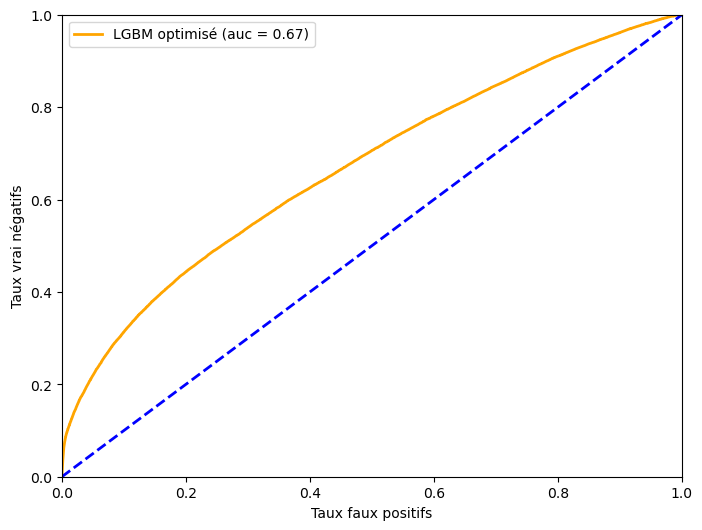

In [10]:
# Courbe ROC et AUC du modèle optimisé
y_test_proba = grid.predict_proba(X_test)
fpr, tpr, seuils = roc_curve(y_test, y_test_proba[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', lw=2, label='LGBM optimisé (auc = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='blue', lw=2, ls='--')
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrai négatifs')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

## Interprétabilité globale

In [40]:
# Interprétabilité avec la librairie DALEX
import dalex as dx

exp = dx.Explainer(lgbm, X_train_ru, y_train_ru)

Preparation of a new explainer is initiated

  -> data              : 138468 rows 90 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 138468 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x00000210911704C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0177, mean = 0.5, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.964, mean = -5.39e-06, max = 0.943
  -> model_info        : package lightgbm

A new explainer has been created!


In [87]:
# On calcule la feature importance avec la librairie DALEX
feature_import = exp.model_parts(B=10, random_state=42)

# On affiche les 20 features les mieux notées avec la feature importance
feature_import.plot(max_vars=20, vertical_spacing=0.15)

In [65]:
# On calcule et on affiche le Partial Dependence Profile pour 
# la distance, l'angle du tir, l'écart au score et le temps restant
pdp = exp.model_profile(type = 'partial',
                        variables = ["shot_distance", 
                                     "shot_angle",
                                     "score_margin",
                                     "time_remain_curper"])
pdp.plot(size=4, 
         horizontal_spacing=0.1,
         vertical_spacing=0.1)

Calculating ceteris paribus: 100%|██████████| 4/4 [00:00<00:00, 22.85it/s]


## Interprétabilité locale

In [85]:
# On sélectionne 1 tentative de tir ratée et 1 tirs réussi 
# au hasard dans le jeu de données de test pour étudier 
# l'interprétabilité locale du modèle

n_missed_shots = (y_test==0).sum()
n_made_shots = (y_test==1).sum()
missed_shot = X_test[y_test==0].iloc[np.random.choice(n_missed_shots,1),:]
made_shot = X_test[y_test==1].iloc[np.random.choice(n_made_shots,1),:]
print("Tir raté sélectionné : ")
display(missed_shot)
print("\n Tir réussi sélectionné : ")
display(made_shot)

Tir raté sélectionné : 


,period,shot_distance,game_played,game_won,game_loss,won_ratio,won_ratio_at_home,won_ratio_away,score_margin,height,...,player_1_position_SF,player_1_position_SG,player_1_pos_type_EXT,player_1_pos_type_INT,dominant_hand_Left,dominant_hand_Right,shoot_type_dunk,shoot_type_jump_shoot,shoot_type_layup,shoot_type_turnaround
33532,1,172.69916,21,12,9,0.571,0.6,0.545455,5,190.0,...,0,0,1,0,0,1,0,1,0,0



 Tir réussi sélectionné : 


,period,shot_distance,game_played,game_won,game_loss,won_ratio,won_ratio_at_home,won_ratio_away,score_margin,height,...,player_1_position_SF,player_1_position_SG,player_1_pos_type_EXT,player_1_pos_type_INT,dominant_hand_Left,dominant_hand_Right,shoot_type_dunk,shoot_type_jump_shoot,shoot_type_layup,shoot_type_turnaround
55696,2,36.674242,54,38,16,0.704,0.851852,0.555556,11,213.0,...,0,0,0,1,0,1,0,0,1,0


In [91]:
# On calcule les valeurs de Shapley pour le tir raté sélectionné
shap_missed = exp.predict_parts(missed_shot, type='shap')

# On affiche les valeurs de Shapley
shap_missed.plot(max_vars=20)

In [92]:
# On calcule les valeurs de Shapley pour le tir réussi sélectionné
shap_made = exp.predict_parts(made_shot, type='shap')

# On affiche les valeurs de Shapley
shap_made.plot(max_vars=20)

In [100]:
# On calcule les courbes des profiles 'Ceteris-Paribus'
# qui indiquent comment la prédiction évolue en faisant une seule
# variable

cp_missed = exp.predict_profile(missed_shot, 
                                variables = ["shot_distance", 
                                             "shot_angle",
                                             "score_margin",
                                             "time_remain_curper"], 
                                label='Tir raté')
cp_made = exp.predict_profile(made_shot, 
                              variables = ["shot_distance", 
                                           "shot_angle",
                                           "score_margin",
                                           "time_remain_curper"], 
                              label='Tir réussi')

# On affiche les courbes sur le même graphique
cp_missed.plot(cp_made, 
               horizontal_spacing=0.1,
               vertical_spacing=0.1)

Calculating ceteris paribus: 100%|██████████| 4/4 [00:00<00:00, 399.98it/s]


## Deep Learning avec modèles RNN

In [84]:
# On souhaite  maintenant tester la performance d'un simple réseau dense de neurones 
# par rapport aux modèles de ML classiques présentés ci-dessus

# On utilise l'architecture suivante pour le réseau
inputs = Input(shape=X_train.shape[1], name='Input')
first_layer = Dense(units=64, activation='relu')
second_layer = Dense(units=32, activation='relu')
final_layer = Dense(units=1, activation='sigmoid')

x = first_layer(inputs)
x = second_layer(x)
outputs = final_layer(x)

# Ajout des couches pour constuire un modèle RNN
from tensorflow.keras.optimizers import Adam
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='BinaryCrossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 90)]              0         
                                                                 
 dense_83 (Dense)            (None, 64)                5824      
                                                                 
 dense_84 (Dense)            (None, 32)                2080      
                                                                 
 dense_85 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Normalisation des données pour l'utilisation dans un RNN
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Entrainement du réseau
n_epochs = 200
batch_size = 2048
val_split = 0.2
training_history = model.fit(X_train_norm, y_train, 
                             epochs=n_epochs, 
                             batch_size=batch_size, 
                             validation_split=val_split)

Epoch 1/200
59/59 [==============================] - 1s 4ms/step - loss: 0.6641 - accuracy: 0.6075 - val_loss: 0.6490 - val_accuracy: 0.6311
Epoch 2/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6201 - val_loss: 0.6443 - val_accuracy: 0.6314
Epoch 3/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6205 - val_loss: 0.6441 - val_accuracy: 0.6320
Epoch 4/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6201 - val_loss: 0.6425 - val_accuracy: 0.6317
Epoch 5/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6213 - val_loss: 0.6435 - val_accuracy: 0.6286
Epoch 6/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6212 - val_loss: 0.6442 - val_accuracy: 0.6319
Epoch 7/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6212 - val_loss: 0.6421 - val_accuracy: 0.6321
Epoch 8/200
5

Epoch 59/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6289 - val_loss: 0.6392 - val_accuracy: 0.6326
Epoch 60/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6281 - val_loss: 0.6418 - val_accuracy: 0.6278
Epoch 61/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6277 - val_loss: 0.6442 - val_accuracy: 0.6267
Epoch 62/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.6291 - val_loss: 0.6389 - val_accuracy: 0.6360
Epoch 63/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6282 - val_loss: 0.6399 - val_accuracy: 0.6315
Epoch 64/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.6296 - val_loss: 0.6382 - val_accuracy: 0.6343
Epoch 65/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.6297 - val_loss: 0.6379 - val_accuracy: 0.6337
Epoch 

59/59 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6434 - val_loss: 0.6553 - val_accuracy: 0.6217
Epoch 174/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.6432 - val_loss: 0.6359 - val_accuracy: 0.6370
Epoch 175/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6470 - val_loss: 0.6445 - val_accuracy: 0.6209
Epoch 176/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6433 - val_loss: 0.6389 - val_accuracy: 0.6286
Epoch 177/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6451 - val_loss: 0.6366 - val_accuracy: 0.6341
Epoch 178/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.6453 - val_loss: 0.6370 - val_accuracy: 0.6329
Epoch 179/200
59/59 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.6454 - val_loss: 0.6425 - val_accuracy: 0.6258
Epoch 180/200

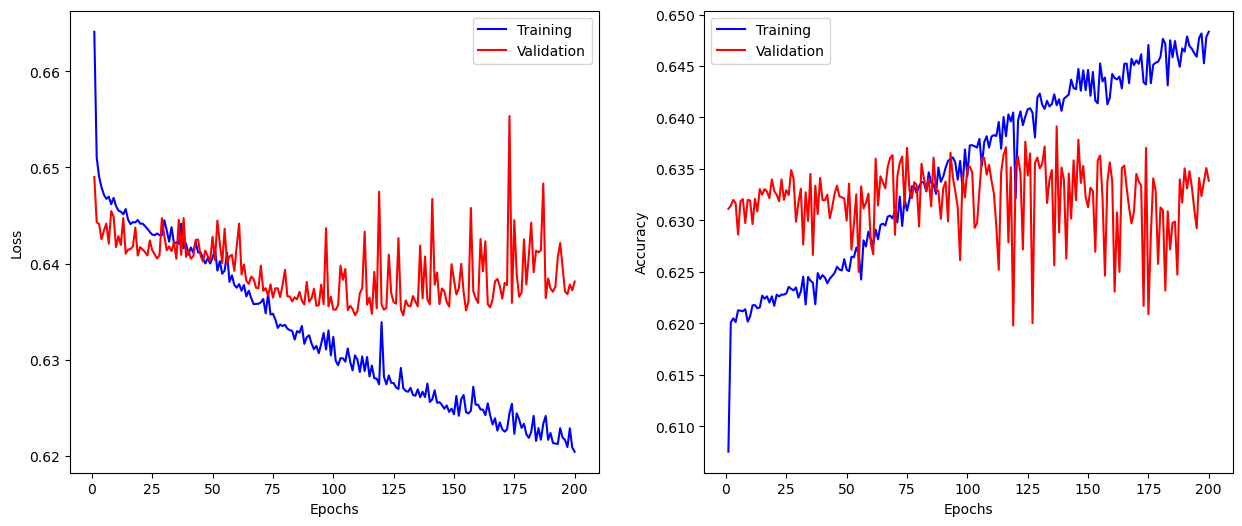

In [86]:
# Courbes d'évolution de la fonction de cout et de la précision 
# en fonction des épochs
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

epochs = range(1,n_epochs+1)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(epochs, loss, color='blue', label='Training')
plt.plot(epochs, val_loss, color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, color='blue', label='Training')
plt.plot(epochs, val_acc, color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [99]:
# Performances du réseau sur la classification des tirs
test_pred = model.predict(X_test_norm)
test_pred_class = np.where(test_pred[:,0]>0.5, 1, 0)

print("Model : RNN")
print("   - Matrice de confusion :")
display(pd.crosstab(y_test, test_pred_class, rownames=['Classe réelle'], colnames=['Classe prédite']))
print("   - Rapport de classifcation :")
print(classification_report(y_test, test_pred_class))

4670/4670 [==============================] - 3s 601us/step
Model : RNN
   - Matrice de confusion :


Classe prédite,0,1
Classe réelle,,
0,62371,17097
1,39659,30288


   - Rapport de classifcation :
              precision    recall  f1-score   support

           0       0.61      0.78      0.69     79468
           1       0.64      0.43      0.52     69947

    accuracy                           0.62    149415
   macro avg       0.63      0.61      0.60    149415
weighted avg       0.62      0.62      0.61    149415

